In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
%matplotlib inline
plt.style.use('seaborn')
import bz2

In [ ]:
!bzcat /home/dsc/Data/challenge/bookings.csv.bz2 | head -10000 > bookings.sample.csv

In [ ]:
!bzip2 -f bookings.sample.csv

In [ ]:
#cuento numero de lineas
! bzcat bookings.sample.csv.bz2 | wc -l

In [ ]:
#ahora con python
import bz2
fileBz2=bz2.BZ2File('/home/dsc/Downloads/bookings.sample.csv.bz2')

In [ ]:
#EN python se hará así
fileBz2=bz2.BZ2File('/home/dsc/Downloads/bookings.sample.csv.bz2')
k=0
for line in fileBz2:
    k+=1
print(k)



In [ ]:
#importante cerrar archivo
fileBz2.closed

In [ ]:
#mas elegante 
with bz2.BZ2File('/home/dsc/Downloads/bookings.sample.csv.bz2') as fileBz2:
    k=0
    for line in fileBz2:
        k+=1
        
print(k)

#la mejor forma de hacerlo

# Ejercicio 2

# Sample

In [ ]:
!bzcat /home/dsc/Data/challenge/bookings.csv.bz2 | head -10000 > bookings.sample.csv

In [35]:
import pandas as pd
DATA=pd.read_csv('/home/dsc/Data/DSMaster/DSMaster/bookings.sample.csv',sep='^')

In [36]:
lista_columnas=[]
for i in DATA.columns:
    lista_columnas.append(i.strip())

In [37]:
DATA.columns=lista_columnas

In [38]:
DATA['rloc'].nunique()

3638

In [39]:
lista=[]
for i in DATA.columns:
    A=DATA[i].isnull().sum()
    lista.append(A)
    
    

In [40]:
sum(lista)
#no hay nulos 


0

In [41]:
#personas en el aeropuerto
personas_aeropuerto=DATA.groupby(['arr_port'])['pax'].sum()

In [45]:
personas_aeropuerto.sort_values(ascending=False).head(10).to_csv('001.csv')

# Big File

In [1]:
from tqdm import tqdm

In [21]:
lista=[]
for chunk in tqdm(pd.read_csv('/home/dsc/Data/DSMaster/DSMaster/bookings.csv.bz2',sep='^',chunksize=10000)):
    lista.append(len(chunk))
    
    lista_columnas=[]
    for i in chunk.columns:
        lista_columnas.append(i.strip())
        
    chunk.columns=lista_columnas
    
    chunk=chunk[['arr_port','pax']]
    
    #chunk['pax']=chunk['pax'].abs()
    
    
    personas_aeropuerto=chunk.groupby(['arr_port'])['pax'].sum().to_frame()
    
    
    if 'group_personas_aeropuerto' in locals():
        group_personas_aeropuerto=group_personas_aeropuerto.append(personas_aeropuerto)
    else:
        group_personas_aeropuerto=pd.DataFrame()

longitud = sum(lista)
grupo=group_personas_aeropuerto.groupby(['arr_port']).sum()
grupo=grupo.sort_values(by='pax',ascending=False).head(10)


1001it [03:24,  4.88it/s]


# 3 ejercicio

In [46]:
!bzcat /home/dsc/Data/challenge/searches.csv.bz2 | head -10000 > searches.sample.csv


bzcat: I/O or other error, bailing out.  Possible reason follows.
bzcat: Broken pipe
	Input file = /home/dsc/Data/challenge/searches.csv.bz2, output file = (stdout)


In [104]:
import pandas as pd
Searches=pd.read_csv('/home/dsc/Data/DSMaster/DSMaster/searches.sample.csv',sep='^')

In [105]:
Searches['TxnCode'].isnull().sum()

0

In [106]:
lista_columnas=[]
for i in Searches.columns:
    lista_columnas.append(i.strip())
    
Searches.columns=lista_columnas

In [107]:
Searches['Month']=Searches['Date'].str[0:7]

In [108]:
Searches=Searches[['Month','Destination','TxnCode']]
Searches=Searches[(Searches['Destination']=='MAD')|(Searches['Destination']=='BRC')|(Searches['Destination']=='AGP')]

In [112]:
aggregated=Searches.groupby(['Month','Destination'])['TxnCode'].count()

In [114]:
aggregated=aggregated.to_frame()

In [115]:
aggregated.to_csv('h.csv')
aggregated=pd.read_csv('h.csv')

In [124]:
aggregated['Month'].to_datetime()

AttributeError: 'Series' object has no attribute 'to_datetime'

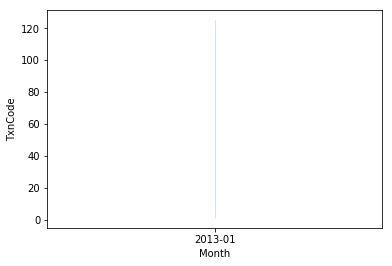

In [121]:
import seaborn as sns
sns.lineplot(data=aggregated,x='Month',y='TxnCode')

In [18]:
for chunk in tqdm(pd.read_csv('/home/dsc/Data/DSMaster/DSMaster/bookings.csv.bz2',sep='^',chunksize=10000)):